In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
df1 = pd.read_csv('Medibuddy Insurance Data Price.csv')
df1.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [5]:
df1.shape

(1338, 5)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB


In [7]:
df1.describe()

,age,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [8]:
df1.isnull().sum()

,0
Policy no.,0
age,0
sex,0
bmi,0
charges in INR,0


In [11]:
df2 = pd.read_csv('Medibuddy insurance data personal details.csv')

In [12]:
df2.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [13]:
df2.shape


(1338, 4)

In [14]:
df2.describe()

,children
count,1338.000000
mean,1.094918
std,1.205493
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [15]:
merged = pd.merge(df1,df2, on = 'Policy no.', how = 'outer')
merged

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830,3,no,northwest
1334,PLC168904,18,female,31.920,2205.98080,0,no,northeast
1335,PLC168913,18,female,36.850,1629.83350,0,no,southeast
1336,PLC168922,21,female,25.800,2007.94500,0,no,southwest


In [16]:
merged.columns

Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR', 'children',
       'smoker', 'region'],
      dtype='object')

In [17]:
merged.isnull().sum()


,0
Policy no.,0
age,0
sex,0
bmi,0
charges in INR,0
children,0
smoker,0
region,0


In [18]:
merged.sex.value_counts()


,count
sex,
male,676
female,662


In [19]:
merged.groupby('sex')['charges in INR'].mean()

,charges in INR
sex,
female,12569.578844
male,13956.751178


In [20]:
merged['charges in INR'].mean()

np.float64(13270.422265141257)

Now let's start with the analysis of data.


**1.Does the gender of the person matter for the company as a constraint for extending policies?**

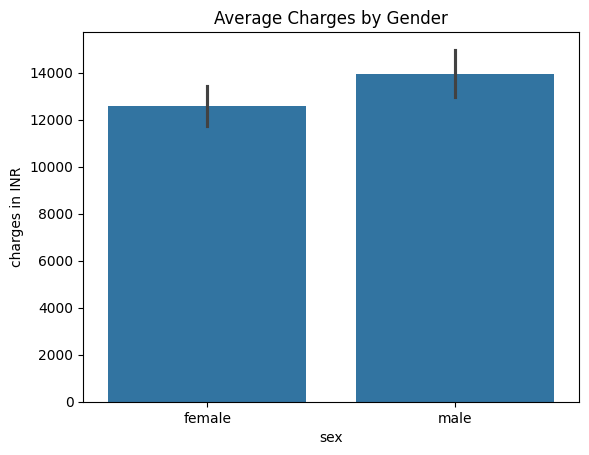

In [21]:
sns.barplot(x='sex', y='charges in INR', data=merged)
plt.title('Average Charges by Gender')
plt.show()

gender_costs = merged.groupby('sex')['charges in INR'].mean()
diff = (gender_costs['male'] - gender_costs['female']) / gender_costs['female'] * 100


 Observation: Gender is not a constraint for issuing policies since nearly equal policies are given to both genders.
 However, men pay on average 11.03% more than women.


 **2.What is the average amount of money the company spent over each policy cover?**

In [23]:
average_policy_cost = merged['charges in INR'].mean()
print(average_policy_cost)



13270.422265141257


Observation: The average amount spent per policy cover provides insight into the company's overall expenditure on insurance policies. This metric helps in understanding the cost distribution and can be used for financial planning.

**3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?**

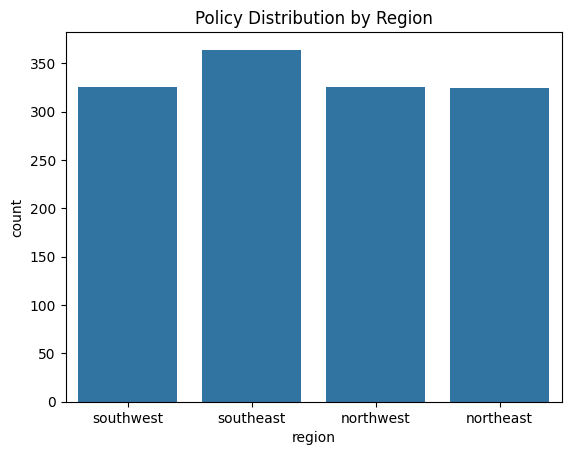

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [24]:
#Geographic Analysis
sns.countplot(x='region', data=merged)
plt.title('Policy Distribution by Region')
plt.show()
print(merged.region.value_counts())

 Observation: The number of policies varies by region, indicating that southeast areas have a higher demand for policies.


**4. Does the no. of dependents make a difference in the amount claimed?**

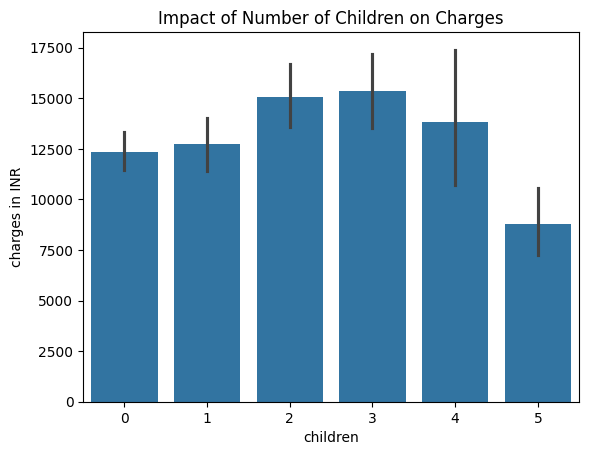

In [26]:
# Dependents Analysis
sns.barplot(x='children', y='charges in INR', data=merged)
plt.title('Impact of Number of Children on Charges')
plt.show()


Observation: Charges slightly vary with the number of children, implying dependents have a minor influence on insurance costs.

**5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?**

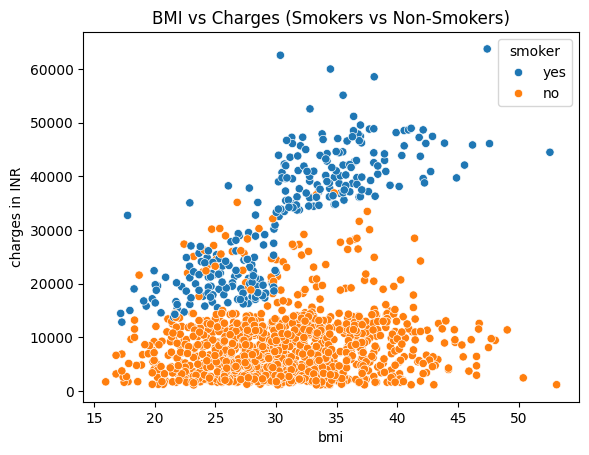

In [27]:
# BMI Analysis
sns.scatterplot(x='bmi', y='charges in INR', hue='smoker', data=merged)
plt.title('BMI vs Charges (Smokers vs Non-Smokers)')
plt.show()


Observation: Higher BMI tends to increase charges, especially for smokers, indicating a health risk factor.

**6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?**

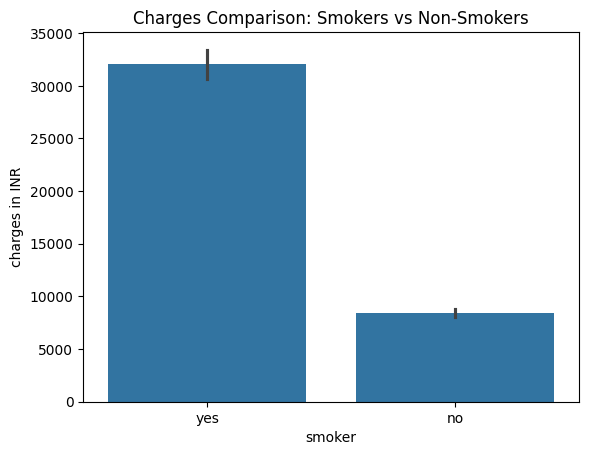

Non-smokers pay only 26.32% of what smokers pay.


In [28]:
#Smoker Analysis
sns.barplot(x='smoker', y='charges in INR', data=merged)
plt.title('Charges Comparison: Smokers vs Non-Smokers')
plt.show()

smoker_costs = merged.groupby('smoker')['charges in INR'].mean()
ratio = smoker_costs['no'] / smoker_costs['yes']
print(f"Non-smokers pay only {ratio * 100:.2f}% of what smokers pay.")

Observation: Smokers pay significantly higher premiums than non-smokers, indicating a major risk factor for insurance pricing.

**7. Does age have any barrier on the insurance claimed?**

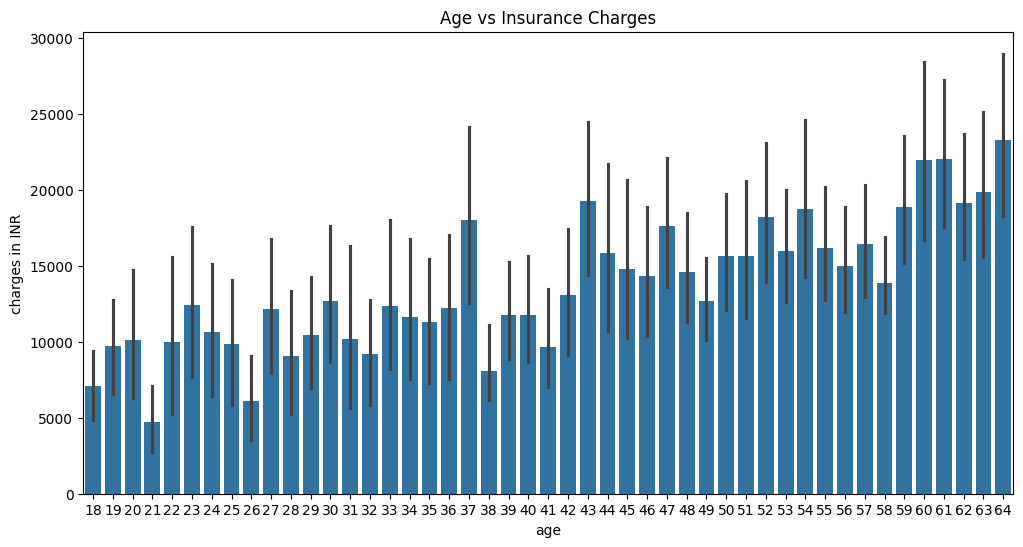

In [32]:
# Age vs Charges
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='charges in INR', data=merged)
plt.title('Age vs Insurance Charges')
plt.show()

In [34]:
merged.groupby('age')['charges in INR'].mean()

,charges in INR
age,
18,7086.217556
19,9747.909335
20,10159.697736
21,4730.464330
22,10012.932802
23,12419.820040
24,10648.015962
25,9838.365311
26,6133.825309



Observation: As age increases, insurance charges also tend to rise, reflecting higher health risks for older individuals.

**8. Can the company extend certain discounts after checking the health status (BMI) in this case?**

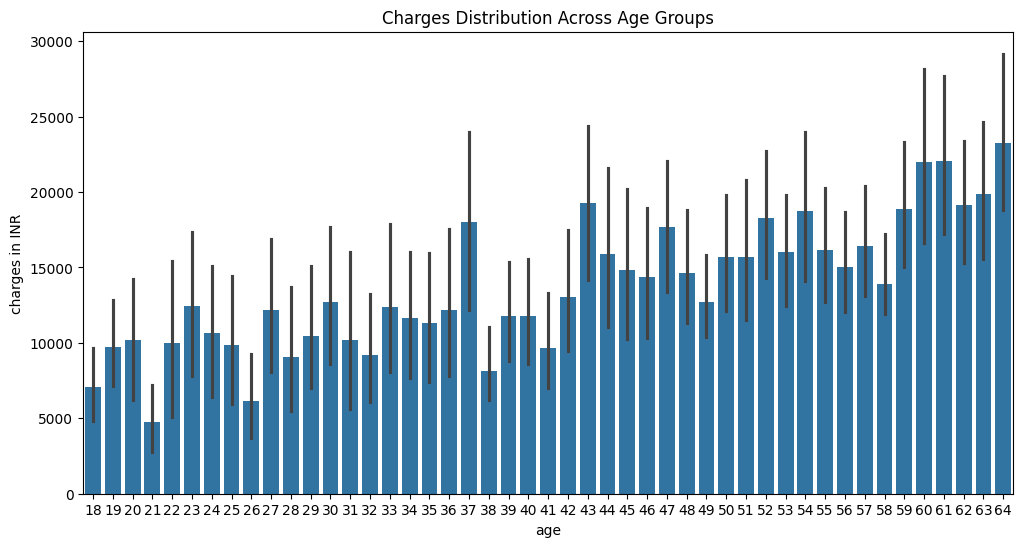

In [37]:
# Discounts Based on BMI & Age
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='charges in INR', data=merged)
plt.title('Charges Distribution Across Age Groups')
plt.show()

Observation :Insurance costs generally rise with BMI, except for those in the 'Healthy Weight' category, where they decrease. This suggests that the company might offer greater discounts to individuals with a healthy BMI and provide fewer discounts as BMI increases, particularly for older policyholders.